In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

**Defining Bootstrapped Two-sampled T-test**
1. Find the t-statistic on the original data
2. Mix the data together
3. Perform bootstrapping on the mixture of data. The parameter of interest is mean
4. Find the t-statistic on the bootstrapped result
5. Repeat step 3 and 4 for desired number of times
6. Find the p-value using following formula:
    $$
    \frac{\text{number of (bootstrapped t-statistic > original t-statistics)}}{\text{number of trails}}
    $$

In [2]:
def bootstrapped_p_value(
    sample_a,
    sample_b, 
    num_bootstrap=1000, 
    equal_var=True,
    two_sided=True
):
    observed_t_stat, _ = stats.ttest_ind(sample_a, sample_b, equal_var=equal_var)
    bootstrap_t_stats = []
    total = np.concatenate((sample_a, sample_b))
    
    for _ in range(num_bootstrap):
        resample_a = np.random.choice(total, size=len(sample_a), replace=True)
        resample_b = np.random.choice(total, size=len(sample_b), replace=True)
        t_stat_bt, _ = stats.ttest_ind(resample_a, resample_b)
        bootstrap_t_stats.append(t_stat_bt)
    
    # Compute p-value
    bootstrap_t_stats = np.array(bootstrap_t_stats)
    
    if two_sided:
        bootstrap_t_stats = np.abs(bootstrap_t_stats)
        observed_t_stat = np.abs(observed_t_stat)
        
    p_value = np.mean(bootstrap_t_stats > observed_t_stat)
    
    return p_value

We can demonstrate that the distribution of p-value is indeed $\text{Uniform}(0,1)$ under null hypothesis

100%|██████████| 1000/1000 [03:41<00:00,  4.51it/s]


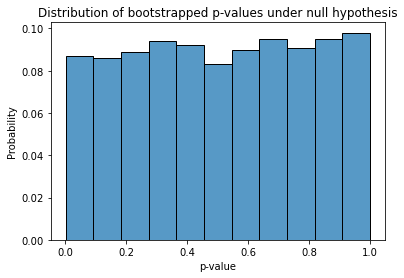

In [3]:
num_simulations = 1000
sample_size = [
    30,
    300
] # sample size is manually set to be unequal

p_values = []

np.random.seed(42)

for _ in tqdm(range(num_simulations)):
    sample_a = np.random.normal(loc=0, scale=1, size=sample_size[0])
    sample_b = np.random.normal(loc=0, scale=1, size=sample_size[1])
    
    p_val = bootstrapped_p_value(sample_a, sample_b)

    p_values.append(p_val)


sns.histplot(p_values, stat='probability')
plt.title('Distribution of bootstrapped p-values under null hypothesis')
plt.xlabel('p-value')
plt.show()

Here's another example with unequal variance.

100%|██████████| 1000/1000 [03:46<00:00,  4.42it/s]


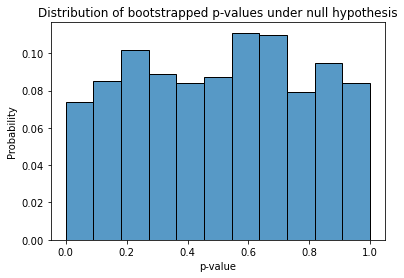

In [4]:
num_simulations = 1000
sample_size = [
    30,
    300
] # sample size is manually set to be unequal

p_values = []

np.random.seed(42)

for _ in tqdm(range(num_simulations)):
    sample_a = np.random.normal(loc=0, scale=1, size=sample_size[0])
    sample_b = np.random.normal(loc=0, scale=4, size=sample_size[1])
    
    p_val = bootstrapped_p_value(sample_a, sample_b, equal_var=False)

    p_values.append(p_val)


sns.histplot(p_values, stat='probability')
plt.title('Distribution of bootstrapped p-values under null hypothesis')
plt.xlabel('p-value')
plt.show()

And also one-sided test.

100%|██████████| 1000/1000 [03:46<00:00,  4.41it/s]


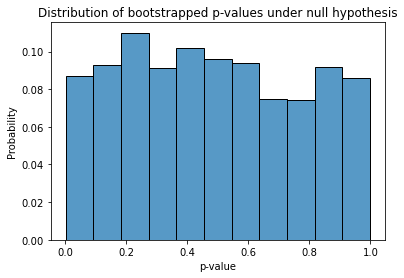

In [5]:
num_simulations = 1000
sample_size = [
    30,
    300
] # sample size is manually set to be unequal

p_values = []

np.random.seed(42)

for _ in tqdm(range(num_simulations)):
    sample_a = np.random.normal(loc=0, scale=1, size=sample_size[0])
    sample_b = np.random.normal(loc=0, scale=1, size=sample_size[1])
    
    p_val = bootstrapped_p_value(sample_a, sample_b, two_sided=False)

    p_values.append(p_val)


sns.histplot(p_values, stat='probability')
plt.title('Distribution of bootstrapped p-values under null hypothesis')
plt.xlabel('p-value')
plt.show()